# Core Plotting Functions

This tutorial will rely on a dataset from 10X originally containing 68k cells from PBMCs. A preprocessed and reduced sample of this dataset (containing 700 cells and 765 highly variable genes) is available through the scanpy package.

We will also rely on the following marker genes from literature:

- **B-cell**: CD79A, MS4A1
- **T-cell**: CD3D
- **NK**: GNLY, NKG7
- **Myeloid**: CST3, LYZ
- **Monocytes**: FCGR3A
- **Dendritic**: FCER1A

## Scatter plots for embeddings

Scanpy allows easy plotting of embeddings such as tSNE and UMAP (and others) using functions like `sc.pl.tsne`, `sc.pl.umap`, etc.

The umap plotting function access information in `adata.obsm['X_umap']`. For more flexibility, any key stored in `adata.obsm` can be used with the generic embedding function `sc.pl.embedding`.

In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

In [3]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


### Load pbmc dataset

In [4]:
pbmc = sc.datasets.pbmc68k_reduced()

In [5]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Visualization of Gene Expression and Other  Variables

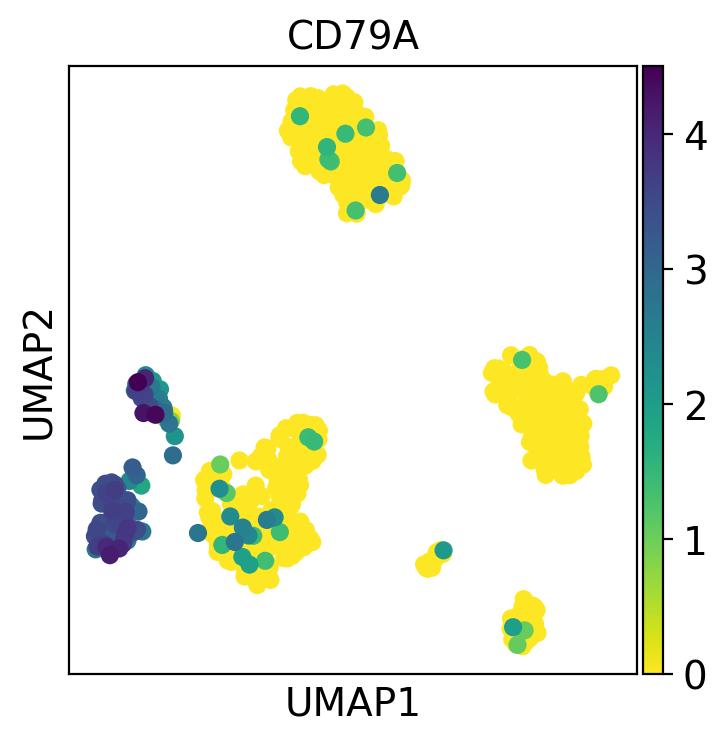

In [6]:
#rcParams is used for the figure size, in this case 4x4
rcParams['figure.figsize'] = 4,4
sc.pl.umap(pbmc, color='CD79A') #looking at a B-cell marker

Let's look at more genes as well as `n_counts` which is the number of UMI counts per cell, and `bulk_lables` which is a categorical value with the original labelling of cells from 10X.

Set number of plots per row using `ncols` parameter. The maximum value being plotted can be adjusted with `vmax` or similiarly `vmin`.  Here we use `p99` which sets the max value to the 99th pecetile. Finally, we use `frameon=False` to remove the boxes around the plots and `s=50` to set the dot size.

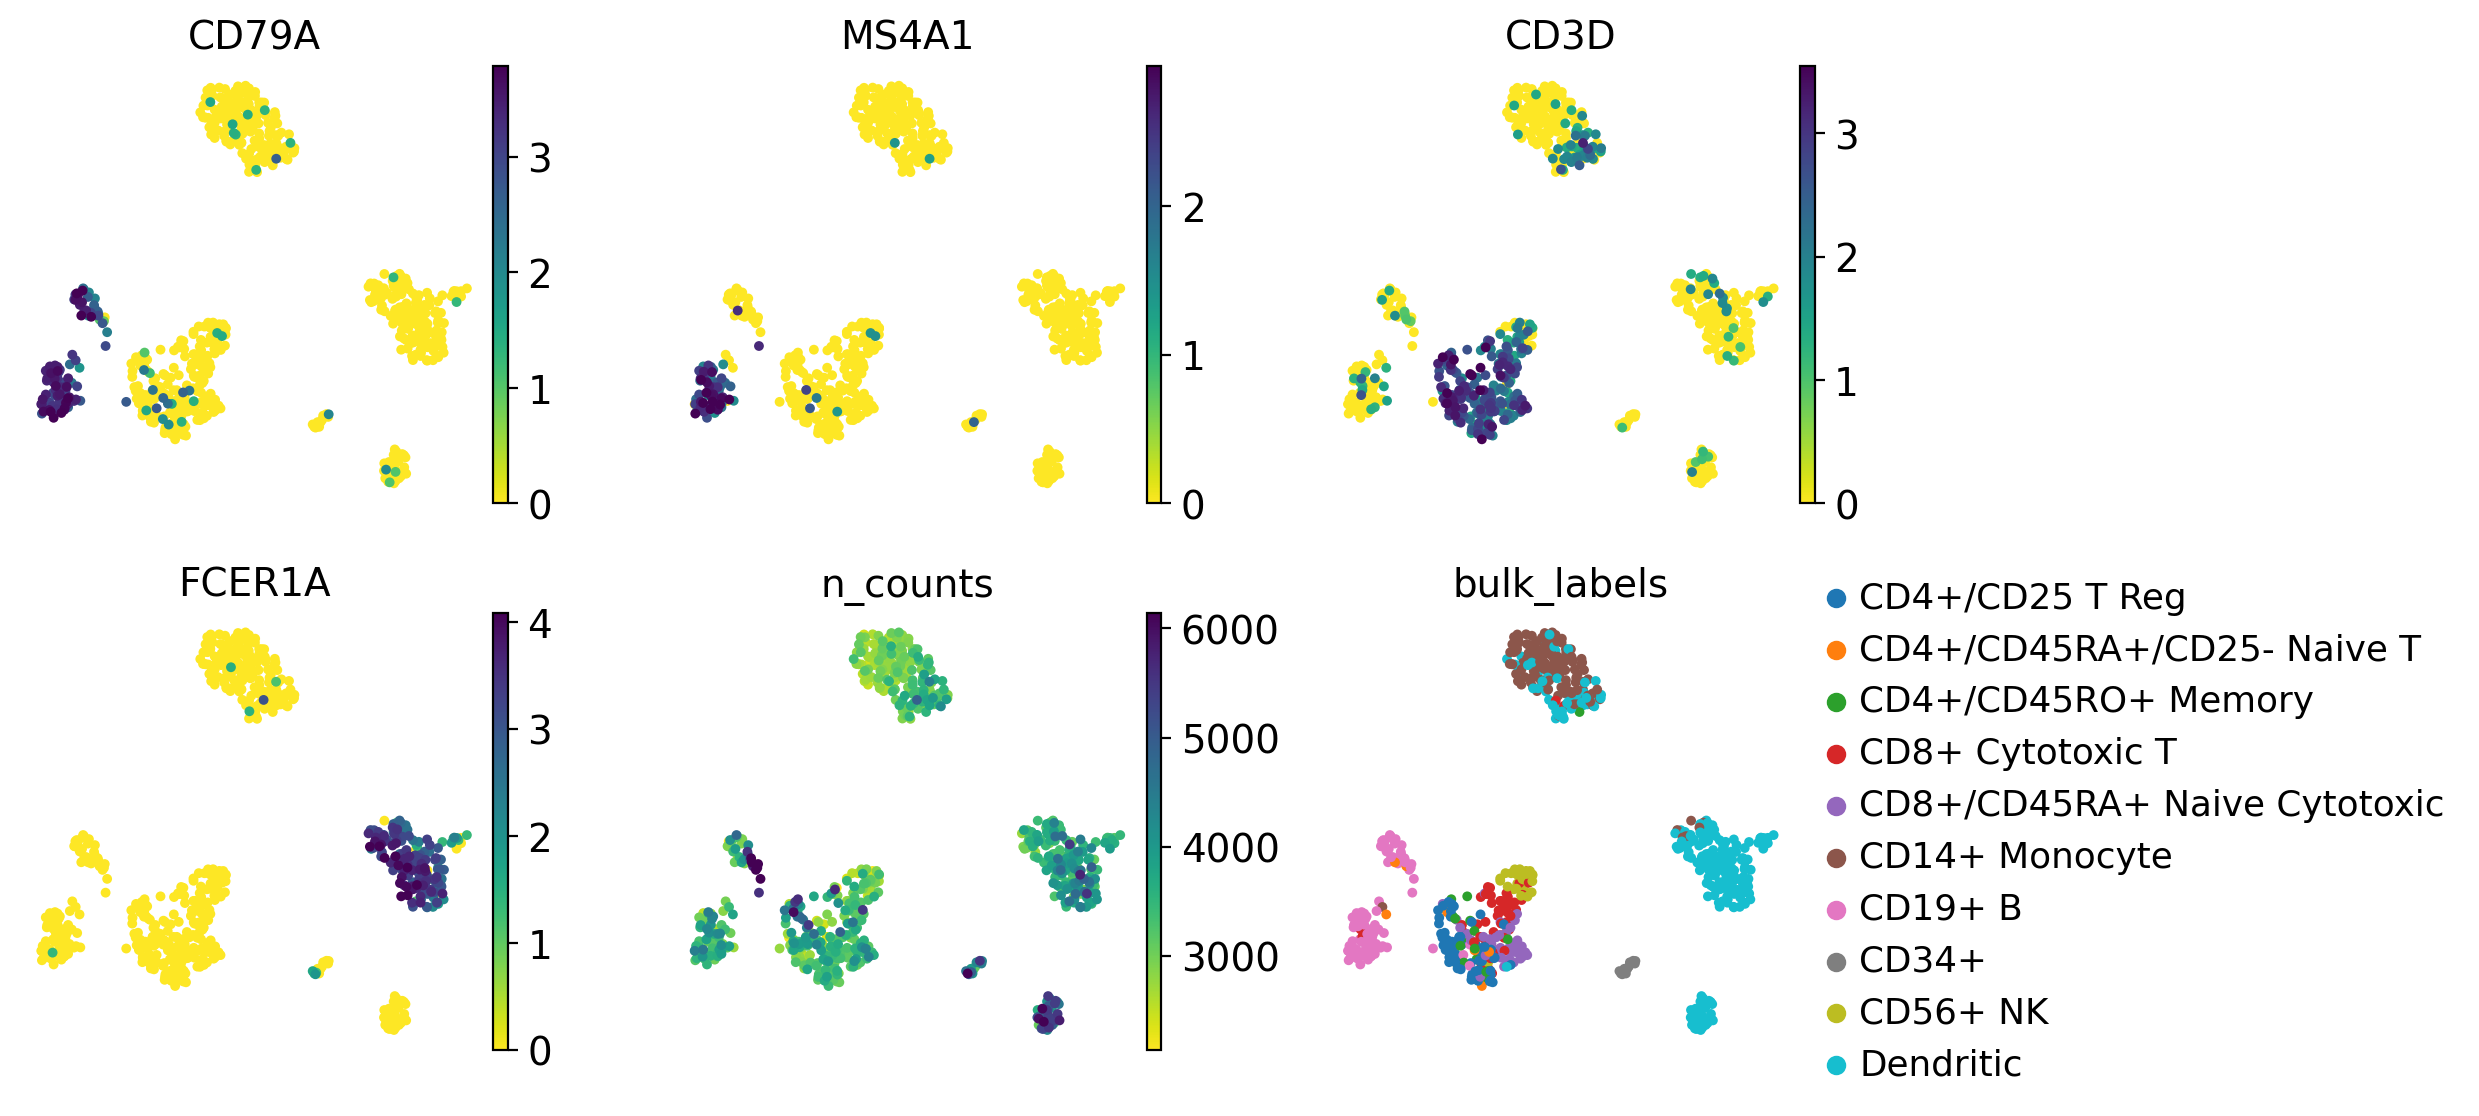

In [7]:
rcParams['figure.figsize'] = 3,3
sc.pl.umap(pbmc, color=['CD79A', 'MS4A1', 'CD3D', 'FCER1A', 'n_counts', 'bulk_labels'], s=50, frameon=False, ncols=3, vmax='p99')
#markers are B cell, B cell, T cell, DC

It appears the markers match the original annotations for the most part. That's good.

Now let's do some clustering using the Leiden method.

In [8]:
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)

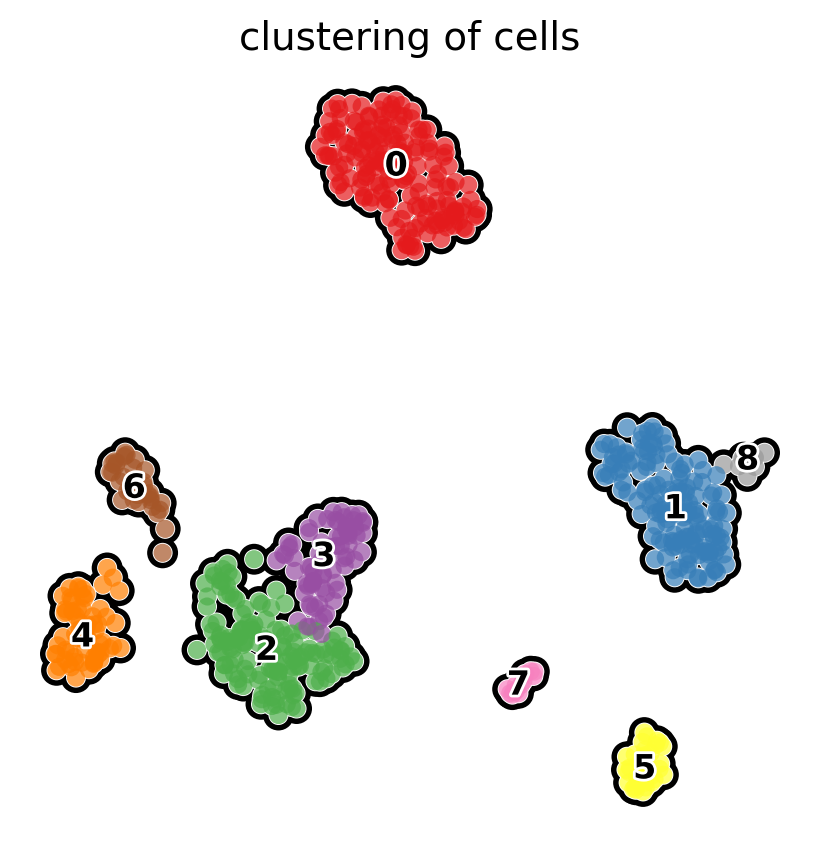

In [10]:
rcParams['figure.figsize']= 5,5
sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data',
          legend_fontsize=12, legend_fontoutline=2, frameon=False,
          title='clustering of cells', palette='Set1')